In [45]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

# Import the API key
from config import weather_api_key

# Import the datetime module from the datetime library
from datetime import datetime

# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [2]:
# Create a practice set of random latitude and longitude combinations
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [3]:
# Use the tuple() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

# Resetting coordinates variable for more practice
coordinates = zip(x, y)

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
# Use the tuple() function to display the latitude and longitude combinations
for coordinate2 in coordinates:
    print(citipy.nearest_city(coordinate2[0], coordinate2[1]).city_name,
          citipy.nearest_city(coordinate2[0], coordinate2[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [5]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

625

In [21]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [32]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"

In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the JSON text of the 'Get' request
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 71.92,
  'feels_like': 71.49,
  'temp_min': 67.95,
  'temp_max': 75.61,
  'pressure': 1017,
  'humidity': 57},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 74, 'gust': 5.01},
 'clouds': {'all': 32},
 'dt': 1632585683,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1632566099,
  'sunset': 1632609398},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [13]:
# Get the JSON data.
boston_data = city_weather.json()

In [14]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 75.61 57 32 1.01


In [15]:
# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-09-25 16:01:23'

In [16]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

# Import the API key
from config import weather_api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library
from datetime import datetime

In [17]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

In [25]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counter.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | el reno
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | nishihara
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | empalme
Processing Record 10 of Set 1 | kavieng
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | saint anthony
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | burica
City not found. Skipping...
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | valle hermoso
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | leningradskiy
Processing Record 21 of Set 1 | jacmel
Processing Record 22 of Set 1 | c

Processing Record 41 of Set 4 | itacoatiara
Processing Record 42 of Set 4 | delta del tigre
Processing Record 43 of Set 4 | kaitangata
Processing Record 44 of Set 4 | sabha
Processing Record 45 of Set 4 | cheuskiny
City not found. Skipping...
Processing Record 46 of Set 4 | mweka
Processing Record 47 of Set 4 | manokwari
Processing Record 48 of Set 4 | raudeberg
Processing Record 49 of Set 4 | kutum
Processing Record 50 of Set 4 | nantucket
Processing Record 1 of Set 5 | dickinson
Processing Record 2 of Set 5 | tiarei
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | lima
Processing Record 5 of Set 5 | adrar
Processing Record 6 of Set 5 | galle
Processing Record 7 of Set 5 | vardo
Processing Record 8 of Set 5 | sangmelima
Processing Record 9 of Set 5 | kununurra
Processing Record 10 of Set 5 | muros
Processing Record 11 of Set 5 | flinders
Processing Record 12 of Set 5 | lorengau
Processing Record 13 of Set 5 | umm lajj
Processing Record 14 of Set 5 | bereda

Processing Record 30 of Set 8 | pangnirtung
Processing Record 31 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 32 of Set 8 | agadez
Processing Record 33 of Set 8 | nanortalik
Processing Record 34 of Set 8 | richards bay
Processing Record 35 of Set 8 | kommunisticheskiy
Processing Record 36 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 37 of Set 8 | lovozero
Processing Record 38 of Set 8 | aybak
City not found. Skipping...
Processing Record 39 of Set 8 | mustasaari
Processing Record 40 of Set 8 | tuatapere
Processing Record 41 of Set 8 | iberia
Processing Record 42 of Set 8 | pullampadi
City not found. Skipping...
Processing Record 43 of Set 8 | sedelnikovo
City not found. Skipping...
Processing Record 44 of Set 8 | burns lake
Processing Record 45 of Set 8 | gbarnga
Processing Record 46 of Set 8 | rundu
Processing Record 47 of Set 8 | airdrie
Processing Record 48 of Set 8 | mittagong
Processing Record 49 of Set 8 | ambanja
Processing Record 5

Processing Record 12 of Set 12 | turka
Processing Record 13 of Set 12 | khani
Processing Record 14 of Set 12 | scarborough
Processing Record 15 of Set 12 | chapais
Processing Record 16 of Set 12 | andreyevo
Processing Record 17 of Set 12 | aswan
Processing Record 18 of Set 12 | deputatskiy
Processing Record 19 of Set 12 | luanda
Processing Record 20 of Set 12 | erzin
Processing Record 21 of Set 12 | grand-santi
Processing Record 22 of Set 12 | anadyr
Processing Record 23 of Set 12 | avera
Processing Record 24 of Set 12 | nazca
Processing Record 25 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 26 of Set 12 | portsmouth
Processing Record 27 of Set 12 | hojai
Processing Record 28 of Set 12 | alofi
Processing Record 29 of Set 12 | karratha
Processing Record 30 of Set 12 | inhapim
Processing Record 31 of Set 12 | baykit
Processing Record 32 of Set 12 | carauari
Processing Record 33 of Set 12 | pochutla
Processing Record 34 of Set 12 | noshiro
Processing Record 35 of Set 

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,El Reno,35.5323,-97.9550,93.20,22,1,24.16,US,2021-09-26 20:54:05
1,Vaini,-21.2000,-175.2000,73.56,83,75,3.44,TO,2021-09-26 20:54:05
2,Mataura,-46.1927,168.8643,41.49,70,5,2.15,NZ,2021-09-26 20:54:06
3,Georgetown,5.4112,100.3354,76.95,94,40,3.00,MY,2021-09-26 20:54:06
4,Chuy,-33.6971,-53.4616,62.06,83,1,6.89,UY,2021-09-26 20:54:06
5,Nishihara,26.1842,127.7558,79.88,95,40,5.75,JP,2021-09-26 20:54:07
6,Albany,42.6001,-73.9662,68.45,47,8,3.00,US,2021-09-26 20:49:33
7,Rikitea,-23.1203,-134.9692,74.01,72,7,20.11,PF,2021-09-26 20:53:28
8,Empalme,27.9667,-110.8167,95.79,39,3,11.50,MX,2021-09-26 20:54:07
9,Kavieng,-2.5744,150.7967,81.16,80,97,5.88,PG,2021-09-26 20:54:08


In [29]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_final = city_data_df[column_order]
city_data_final.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,El Reno,US,2021-09-26 20:54:05,35.5323,-97.9550,93.20,22,1,24.16
1,Vaini,TO,2021-09-26 20:54:05,-21.2000,-175.2000,73.56,83,75,3.44
2,Mataura,NZ,2021-09-26 20:54:06,-46.1927,168.8643,41.49,70,5,2.15
3,Georgetown,MY,2021-09-26 20:54:06,5.4112,100.3354,76.95,94,40,3.00
4,Chuy,UY,2021-09-26 20:54:06,-33.6971,-53.4616,62.06,83,1,6.89
5,Nishihara,JP,2021-09-26 20:54:07,26.1842,127.7558,79.88,95,40,5.75
6,Albany,US,2021-09-26 20:49:33,42.6001,-73.9662,68.45,47,8,3.00
7,Rikitea,PF,2021-09-26 20:53:28,-23.1203,-134.9692,74.01,72,7,20.11
8,Empalme,MX,2021-09-26 20:54:07,27.9667,-110.8167,95.79,39,3,11.50
9,Kavieng,PG,2021-09-26 20:54:08,-2.5744,150.7967,81.16,80,97,5.88


In [88]:
# Create the output file (CSV)
output_data_file = "cities.csv"
# Export the City_Data into a CSV
city_data_final.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

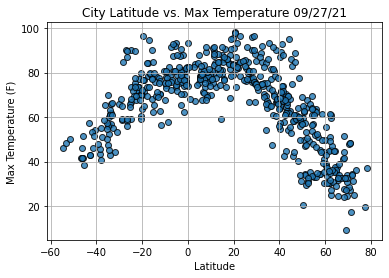

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
# plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

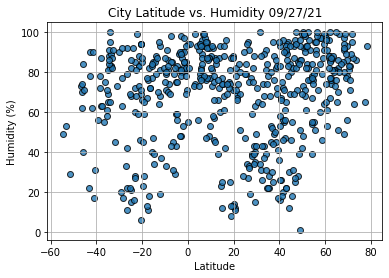

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
# plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

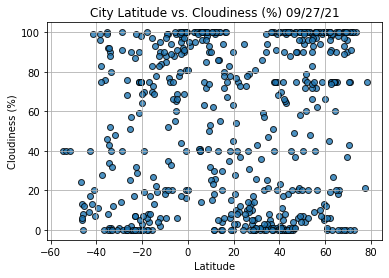

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
# plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

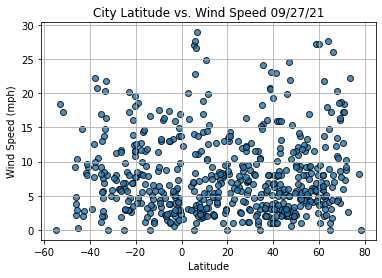

In [51]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
# plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [80]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq+" r_value = "+str(r_value), text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

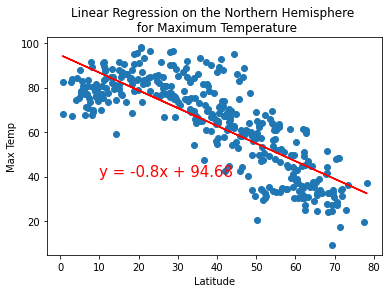

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = f"Linear Regression on the Northern Hemisphere \n for Maximum Temperature"
# Call the function
plot_linear_regression(x_values, y_values, title, 'Max Temp',(10,40))

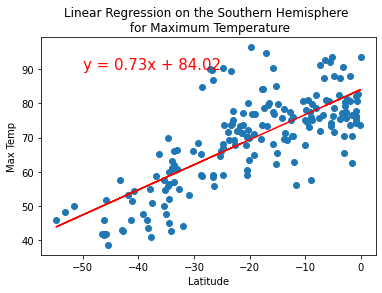

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = f"Linear Regression on the Southern Hemisphere \n for Maximum Temperature"
# Call the function
plot_linear_regression(x_values, y_values, title, 'Max Temp',(-50,90))

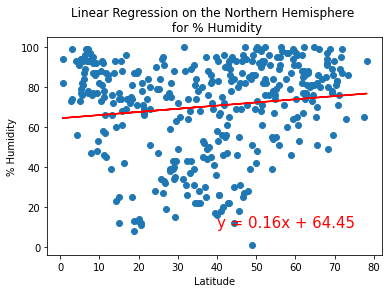

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = f'Linear Regression on the Northern Hemisphere \n for % Humidity'
# Call the function.
plot_linear_regression(x_values, y_values, title, '% Humidity',(40,10))

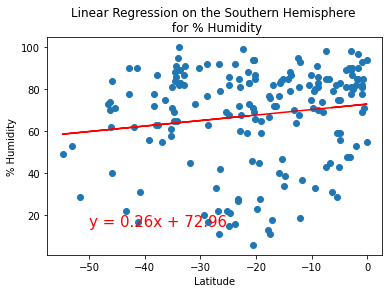

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = f"Linear Regression on the Southern Hemisphere \n for % Humidity"
# Call the function.
plot_linear_regression(x_values, y_values, title, '% Humidity',(-50,15))

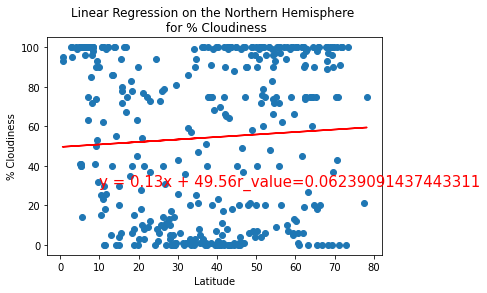

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = f"Linear Regression on the Northern Hemisphere \n for % Cloudiness"
# Call the function.
plot_linear_regression(x_values, y_values, title, '% Cloudiness',(10,30))

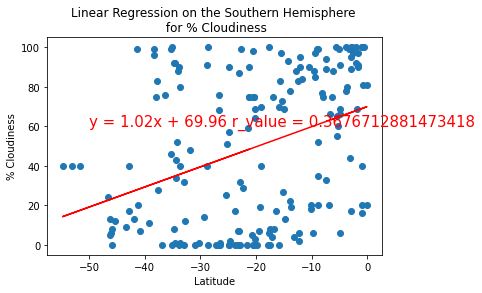

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = f"Linear Regression on the Southern Hemisphere \n for % Cloudiness"
# Call the function.
plot_linear_regression(x_values, y_values, title, '% Cloudiness',(-50,60))

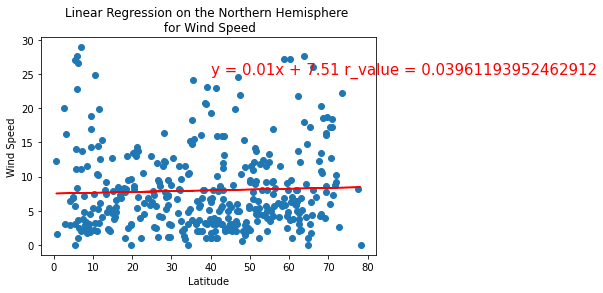

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = f'Linear Regression on the Northern Hemisphere \n for Wind Speed'
# Call the function.
plot_linear_regression(x_values, y_values, title, 'Wind Speed',(40,25))

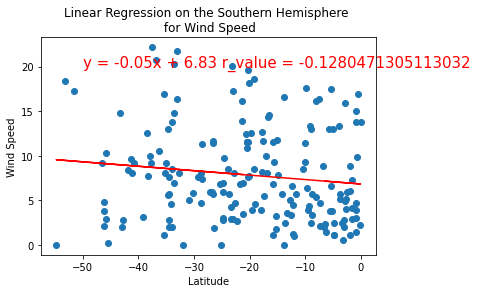

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = f'Linear Regression on the Southern Hemisphere \n for Wind Speed'
# Call the function.
plot_linear_regression(x_values, y_values, title, 'Wind Speed',(-50,20))